In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import datetime

In [2]:
outputpath = 'D://正和/日志/Kafka/'
path = 'D://正和/日志/Kafka/220905/Data_'
suffix = '.txt'
pvdallstep = {}
for num in range(20):
    with open(path+str(num)+suffix,mode='r',encoding='utf-8-sig')as f:
        for line in f:
            newindex = line.index('[',0,len(line))
            pvddatas = json.loads(line[newindex:])
            for pvddata in pvddatas:
                if pvddata['Group'] == 'QXX':
                    continue
                temptime = datetime.datetime.strptime(pvddata['time'],"%Y-%m-%d %H:%M:%S.%f")
                tempstepno = int(pvddata['info']['StepNo'])
                if tempstepno == 999:
                    tempstepno = -5
                if pvddata['devID'] in pvdallstep:
                    new = pd.DataFrame([[temptime,tempstepno]],columns=['time','stepno'])
                    pvdallstep[pvddata['devID']] = pd.concat([pvdallstep[pvddata['devID']], new], ignore_index=True)
                else:
                    pvdallstep[pvddata['devID']] = pd.DataFrame([[temptime,tempstepno]],columns=['time','stepno'])
for devid in pvdallstep:
    pvdallstep[devid] = pvdallstep[devid].sort_values(by='time')

In [3]:
print(pvdallstep)

{'PVD_001':                          time  stepno
0     2022-09-04 20:37:07.252      -1
1     2022-09-04 20:37:12.261      -1
2     2022-09-04 20:37:17.266      -1
3     2022-09-04 20:37:22.274      -1
4     2022-09-04 20:37:27.283       0
...                       ...     ...
15244 2022-09-05 17:49:44.936      -5
15245 2022-09-05 17:49:49.942      -5
15246 2022-09-05 17:49:54.952      -5
15247 2022-09-05 17:49:59.959      -5
15248 2022-09-05 17:50:04.965      -5

[15249 rows x 2 columns], 'PVD_004':                          time  stepno
0     2022-09-04 20:37:07.252      -1
1     2022-09-04 20:37:12.261      -1
2     2022-09-04 20:37:17.267      -1
3     2022-09-04 20:37:22.274      -1
4     2022-09-04 20:37:27.283      -1
...                       ...     ...
15244 2022-09-05 17:49:44.936      -5
15245 2022-09-05 17:49:49.943      -5
15246 2022-09-05 17:49:54.952      -5
15247 2022-09-05 17:49:59.959      -5
15248 2022-09-05 17:50:04.965      -5

[15249 rows x 2 columns], 'PVD_005': 

In [4]:
test = pvdallstep['PVD_003']
print(test.loc[test['stepno'] > 999])

Empty DataFrame
Columns: [time, stepno]
Index: []


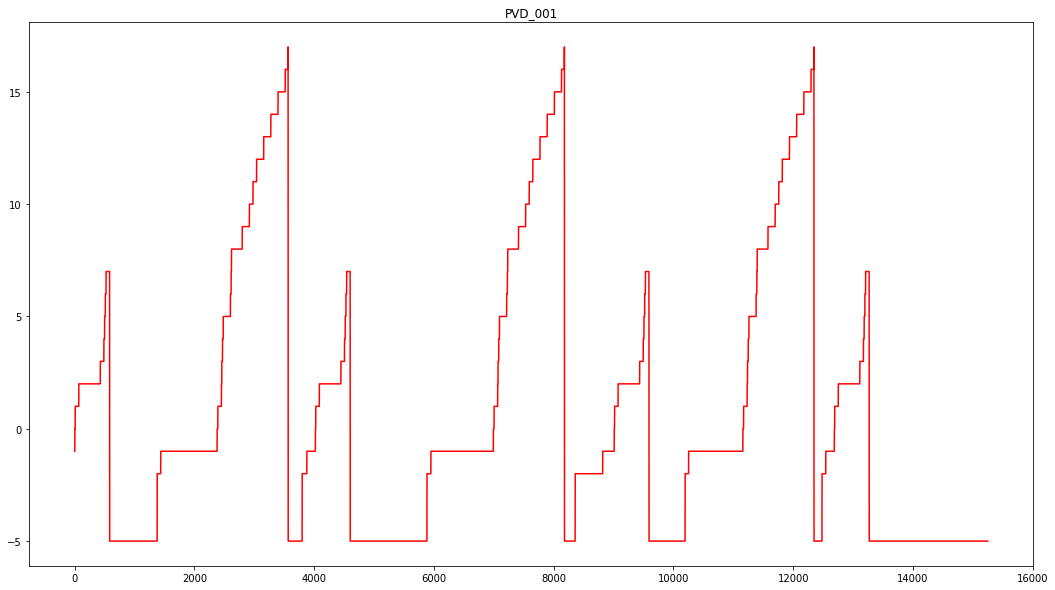

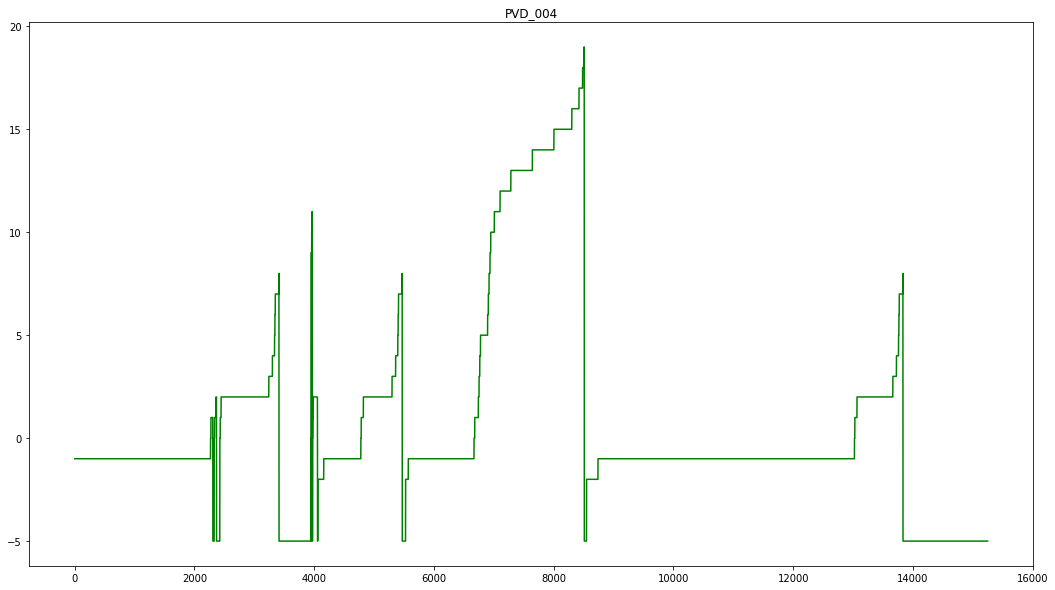

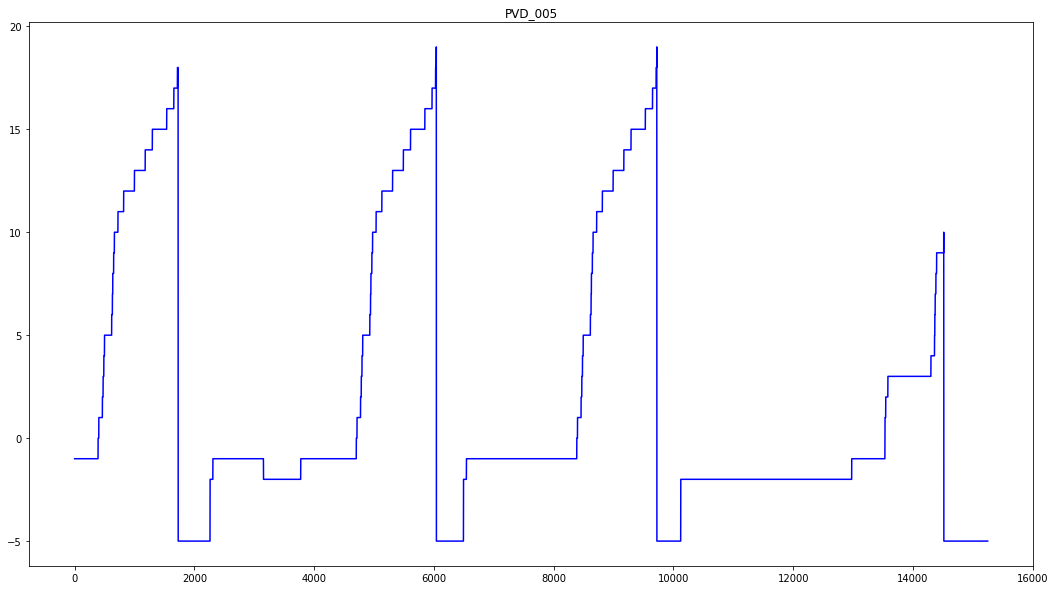

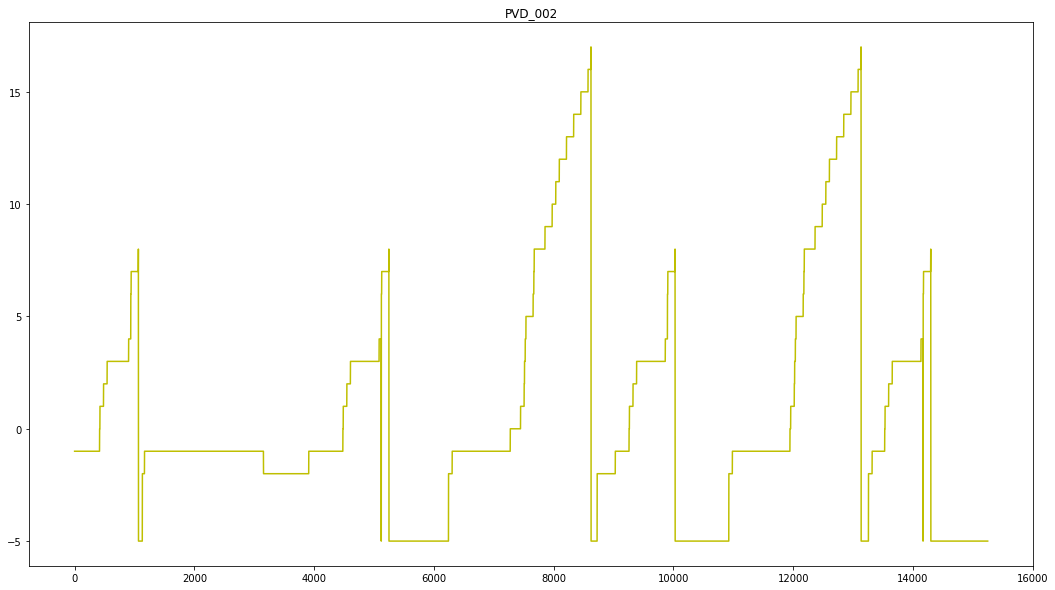

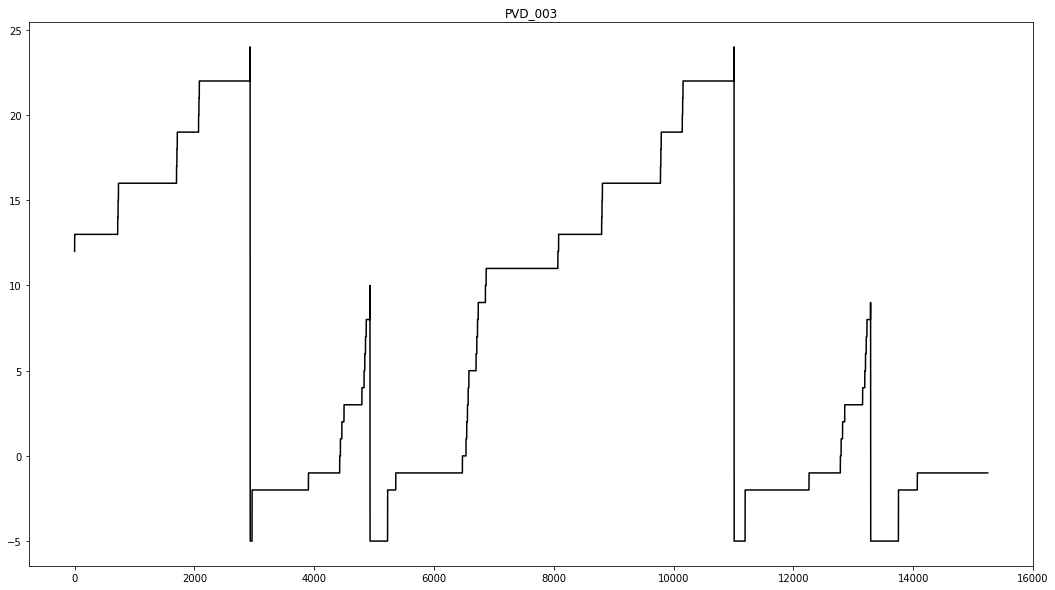

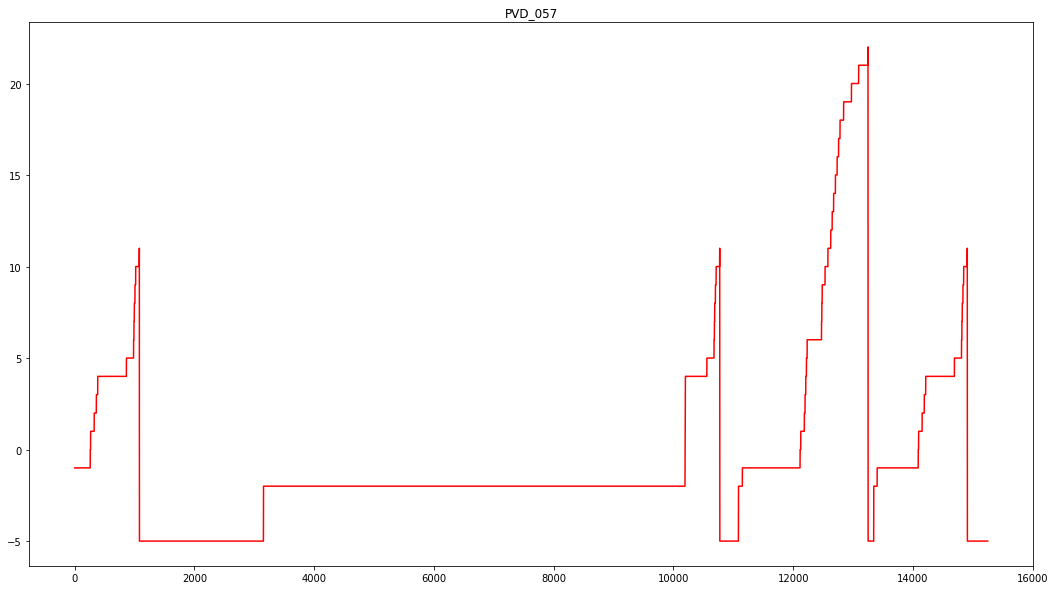

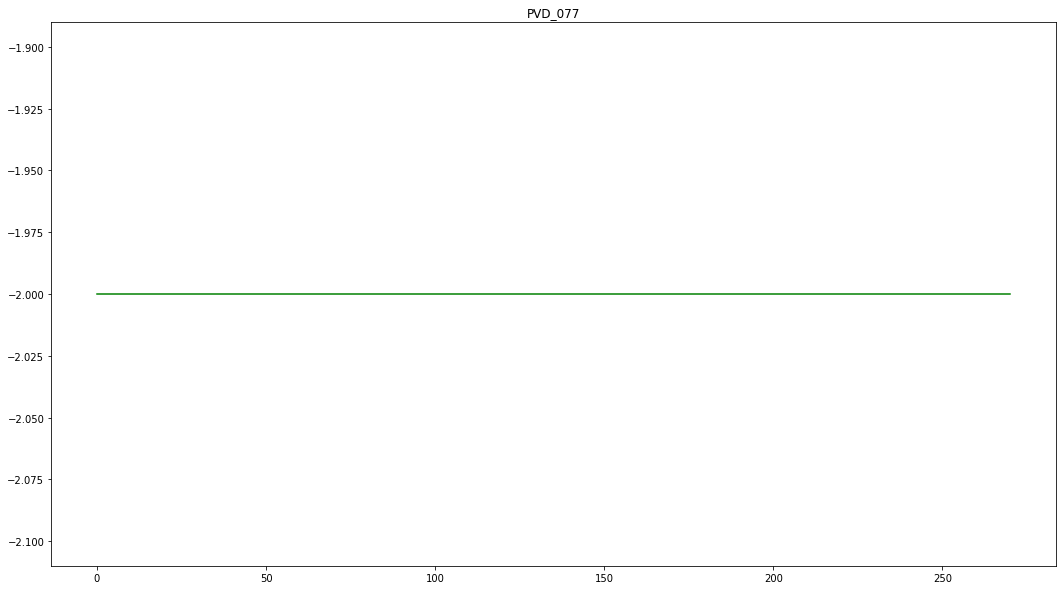

In [4]:
devno = 0
colors = ['r','g','b','y','k','r','g','b','y','k']
for devid,tempdf in pvdallstep.items():
    fig = plt.figure(devno + 1)
    fig.set_size_inches(18,10,forward=True)
    x = range(len(pvdallstep[devid]['stepno']))
    y = list(pvdallstep[devid]['stepno'])
    newline = plt.plot(x,y)
    plt.setp(newline,color = colors[devno])
    plt.title(devid)
    plt.show()
    devno += 1